<IPython.core.display.Javascript object>


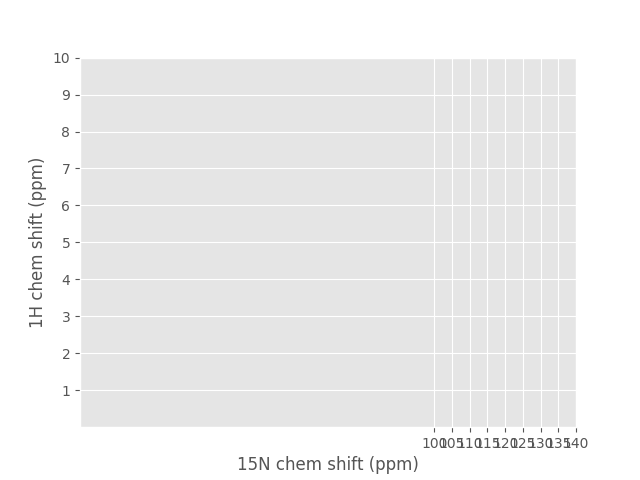

VBox(children=(HBox(children=(ToggleButtons(options=('2D shift map', 'Histograms', 'Titration', '3D structure'), tooltips=['2D shift map on all residus', 'Histograms of delta chemicals shifts', 'Titration curve, 3D structure protein'], value='2D shift map'),)), HBox(children=(Text(value='', description='Residu number to zoom on', placeholder='Enter residu numbe'), VBox(children=(Textarea(value='', placeholder='Files uploaded'), Button(description='Upload files', style=ButtonStyle(), tooltip='Upload all files in the new study'), Dropdown(description='Select step', options=('Step 0', 'Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5', 'Step 6', 'Step 7', 'Step 8', 'Step 9', 'Step 10', 'All steps'), value='Step 0'), ColorPicker(value='#FFA810', concise=True, description='Step color'), Checkbox(value=False, description='Parameters by default'), Button(description='Validate', icon='check', style=ButtonStyle(), tooltip='Validate plot and cutoff choice'), Button(description='Save job', style=ButtonStyle(), tooltip='Save the current job'), Button(description='Load job', style=ButtonStyle(), tooltip='Load an older job'), Button(description='Save image', style=ButtonStyle(), tooltip='Save plot image'))), VBox(children=(Textarea(value='Residus not retained in the study: \n123, 142, 202', placeholder='Residus not retained in the study'), Textarea(value='', placeholder='Console')))))))

In [81]:
###################################################################################################################

                                            ### Dependencies ###

###################################################################################################################

from ipywidgets import *
import ipywidgets as widgets
from __future__ import print_function
from IPython.display import display, clear_output
from IPython.html import widgets
import os


#####################################Plot dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

###################################################################################################################

                                            ### Classes ###

###################################################################################################################

class Titration(object):
    """Titration class test."""
    def __init__(self, checkPlot, plotName, plotValue):
        self.checkPlot = checkPlot
        self.plotName = plotName
        self.plotValue = plotValue

###################################################################################################################

                                            ### Functions ###

###################################################################################################################
def filesLoad():
    """Display files loaded in the textarea."""

    #return print("Files loaded :")
    
def menuSelection(change):
    if change['new'] == '2D shift map':
        menuSelected = '2D shift map'
    elif change['new'] == 'Histograms':
        menuSelected = 'Histograms'
    elif change['new'] == 'Titration':
        menuSelected = 'Titration'
    elif change['new'] == '3D structure':
        menuSelected = '3D structure'
    return print(menuSelected)
    
def fileListLoad (button):
    """Select files .list to load."""
    
    return print("Job launch !")

def getAPlot(button):
    """ """
    clear_output
    print(stepsList.value)

def parametersDefault(button):
    """ """
    
    #return default.value = True
    
def validateSelection(button):
    """Validate color and plot selection when validate button is clicked """
    
    if default.value == False :
        if selectResidu.value == '':
            print("Color all residus of {0} in {1}.".format(stepsList.value, colorSelection.value))
        elif selectResidu.value != '' :
            residuObserveListAdd()
            
    elif default.value == True :
        selectResidu.value = ''
        colorSelection.value = '#FFA810'
        stepsList.value = 'Step 0'
        default.value = False
        residuObserved = list()
        print(residuObserved)
        console.value = "All parameters return at defaults values."

def residuObserveListAdd():
    """Select a new cutoff."""
    
    try :
        if selectResidu.value != "":
            newResiduSelected = selectResidu.value.split(" ")
            for residu in newResiduSelected :
                if residu != '' :
                    residu = int(residu)
                    if type(residu) == int :
                        residuObserved.append(residu)
                    else :
                        raise TypeError
                elif residu == '':
                    pass
            if console.value != "":
                console.value = "{0}\nSelect residu {1} in {2} in {3}.".format(console.value, selectResidu.value, 
                    colorSelection.value, stepsList.value)
            elif console.value == "" :
                console.value = "Select residu {0} in {1} in {2}.".format(selectResidu.value, colorSelection.value, 
                    stepsList.value)
            selectResidu.value = ""
        else :
            print("\nNo residus selected.")
    except TypeError :
        console.value = "{0}\n{1}".format(console.value, "Only integer can be write !")

def saveJobPickl(button):
    """Save the current job to binary format."""
    print("Job save !")
    
def loadJobPickl(button):
    """Load an older job in a binary format."""
    
    print("Job load !")

def saveImage(button):
    """Save the plot image."""
    
    print("Image saved.")

def notRetained(notRetainedList):
    """ """
    
    warningPhrase = "Residus not retained in the study: \n"
    if len(notRetainedList) == 0:
        residuNotReatined.value = "All residus retained in the study !"
    elif len(notRetainedList) > 0 :
        for residu in notRetainedList :
            residu = str(residu)
            if warningPhrase == "Residus not retained in the study: \n":
                warningPhrase = "{0}{1}".format(warningPhrase, residu)
            elif warningPhrase != "Residus not retained in the study: \n":
                warningPhrase = "{0}, {1}".format(warningPhrase, residu)
    
    return warningPhrase
    
###################################################################################################################

                                        ### Python code not graphical ###

###################################################################################################################

#####################################Residu selected

notRetainedList = [123, 142, 202]
warningPhrase = notRetained(notRetainedList)
residuObserved = list()

#####################################Plot list
plotList = list()
i = 0
while i <= 10 : 
    plot = Titration(False, "Step {0}".format(i), i)
    plotList.append(plot)
    i += 1
    
plot = Titration(False, "All steps", "all")
plotList.append(plot) 

stepList=list()
for plot in plotList:
    stepList.append(plot.plotName)
        
#####################################Plot
plt.style.use('ggplot')

nbResiduList = [174, 152, 135, 164, 235, 202, 156]
intensity = [0.2,0.4,0.03,0.23]

#preparing the plot 
data = pd.DataFrame()
x = [100, 105, 110, 115, 120, 125, 130, 135, 140]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('15N chem shift (ppm)')
plt.ylabel('1H chem shift (ppm)')
plt.xticks(x)
plt.yticks(y)
plt.show

plt.show()
    
###################################################################################################################

                                            ### Widgets ###

###################################################################################################################

#####################################Onglets menu

menu= widgets.ToggleButtons(options=['2D shift map', 'Histograms', 'Titration', '3D structure'], value='2D shift map',
        disabled=False, button_style='', tooltips=['2D shift map on all residus', 
        'Histograms of delta chemicals shifts', 'Titration curve, 3D structure protein'])

menu.observe(menuSelection, 'value')

#####################################Right menu

loadFile = widgets.Button(value=False, description='Upload files', disabled=False, button_style='', 
        tooltip='Upload all files in the new study')
consoleFileLoad = widgets.Textarea(value = filesLoad() , placeholder='Files uploaded', description='', 
        disabled=False)
stepsList = widgets.Dropdown(options= stepList, value=plotList[0].plotName, description='Select step', disabled=False,
        tooltip='Select a step')
colorSelection = widgets.ColorPicker(concise=True, description='Step color', value='#FFA810', disabled=False,
        tooltip='Affect a color to a step')
default = widgets.Checkbox(value=False, description='Parameters by default',disabled=False, 
        tooltip='Return parameters values by default')
validate = widgets.Button(value=False, description='Validate', disabled=False, button_style='', 
        tooltip='Validate plot and cutoff choice', icon='check')
saveJob = widgets.Button(value=False, description='Save job', disabled=False, button_style='', 
        tooltip='Save the current job')
loadJob = widgets.Button(value=False, description='Load job', disabled=False, button_style='', 
        tooltip='Load an older job')
imageSave = widgets.Button(value=False, description='Save image', disabled=False, button_style='', 
        tooltip='Save plot image')

loadFile.on_click(fileListLoad)
stepsList.observe(getAPlot)
default.observe(parametersDefault)
validate.on_click(validateSelection)
saveJob.on_click(saveJobPickl)
loadJob.on_click(loadJobPickl)
imageSave.on_click(saveImage)

#########################################Select residu

selectResidu = widgets.Text(value='',placeholder='Enter residu numbe',description='Residu number to zoom on',
    disabled=False, height='100%', width='200%')

selectResiduMenu = VBox([selectResidu])

#########################################Console

residuNotRetained = widgets.Textarea(value= warningPhrase, placeholder='Residus not retained in the study', description='', disabled=False, 
    display='flex', flex_flow='row', height='1000px')
console = widgets.Textarea(value= '', placeholder='Console', description='', disabled=False, 
    display='flex', flex_flow='row', height='1000px')

consolesMenu = VBox([residuNotRetained, console])
###################################################################################################################

                                        ### Display widgets ###

###################################################################################################################

#########################################Organisation

#Third box level
rightMenu = VBox([consoleFileLoad, loadFile, stepsList, colorSelection, default, validate, saveJob, loadJob, 
    imageSave])

#Secondary box level
higher_box = HBox([menu])
center_box = HBox([selectResidu, rightMenu, consolesMenu])

#Primary box level
VBox([higher_box, center_box], min_height='100%', min_width='100%')